In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

Задача 1

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [11]:
d=np.random.rand(1000)
start_time = time.time()
a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
acum=a.cumsum()
d1=d*acum[-1]
s=acum[-2]
for i in range(len(a)-1,-1,-1):
    m=(s<d1)&(d1<acum[i])
    if i!=0:
        s-=a[i-1]
    d1[m]=i
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.001973867416381836 seconds ---


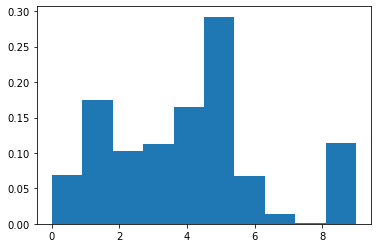

In [12]:
plt.hist(d1,density=True)
plt.show()

Теперь отсортированные веса

In [15]:
start_time = time.time()
a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
np.sort(a)
ac=a.cumsum()
d1=d*ac[-1]
s=acum[-2]
for i in range(len(a)-1,-1,-1):
    m=(s<d1)&(d1<acum[i])
    if i!=0:
        s-=a[i-1]
    d1[m]=i
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0019736289978027344 seconds ---


Как-то так же...

Задача 2

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

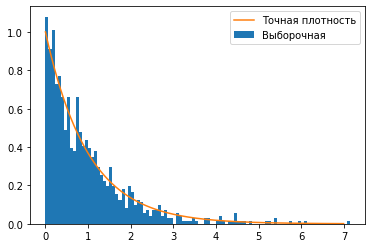

In [18]:
lambdaa=1
v=np.random.rand(1000)
v=-np.log(1-v)/lambdaa
plt.hist(v, bins=100, density=True, label='Выборочная')
plt.plot(np.arange(700)/100,np.exp(-np.arange(700)*lambdaa/100)*lambdaa, label='Точная плотность')
plt.legend()
plt.show()

Задача 3

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

Обоснование: кидая точки так, как мы осудили на паре, мы получаем равномерное распределение под графиком исходной плотности, а т.к. он покрывает график плотности сл велечины, которую нужно смоделировать, мы получаем равномерное распределение и под этим графиком плотности.Посчитаем функцию распределения абсцис подходящих точек :
F(a) = P(X<a) =|т.к. распределение под графиком равномерно|=площадь под графиком при x<a делить на общую площадь под графиком = площадь под графиком при x<a = интеграл от плотности от 0 до а = функция распределения нужной нам случ. величены.

In [22]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
a=np.empty(0, dtype=float)
с=0
while с<1000:
    x=(np.random.rand()-0.5)*8
    if(np.random.rand()*0.35<dist.pdf(x)):
        a = np.append(a, x) 
        с+=1


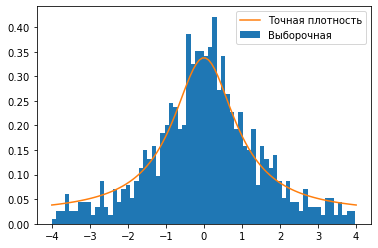

In [23]:
x = np.linspace(-4, 4, 100)
plt.hist(a, bins=70, density=True, label='Выборочная')
plt.plot(x, dist.pdf(x)+(2*np.arctan(-4)/3.1415926+1)/8, label='Точная плотность')
plt.legend()
plt.show()

Задача 4

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

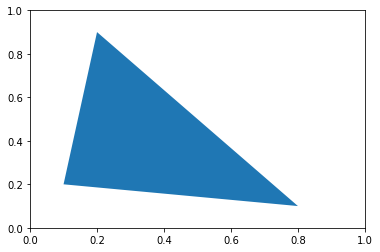

In [9]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]))
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

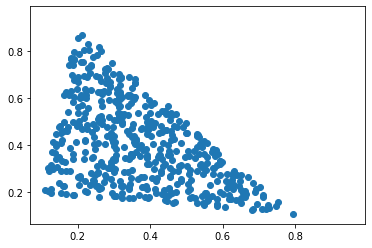

In [39]:
d=np.random.rand(500,2)
s=d.sum(axis=1)
m=s>1
np.place(d[:,0], m, 1-d[m][:,0])
np.place(d[:,1], m, 1-d[m][:,1])
C=np.array([7/np.sqrt(50),1/np.sqrt(50),-1/np.sqrt(50),7/np.sqrt(50)]).reshape(2,2)
d=np.matmul(C,d.T).T
d=d*np.sqrt(50)/10+np.array([0.1,0.2])
plt.scatter(d[:,0],d[:,1])
plt.scatter(0.95,0.95,c='white')
plt.show()

Задача 5

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

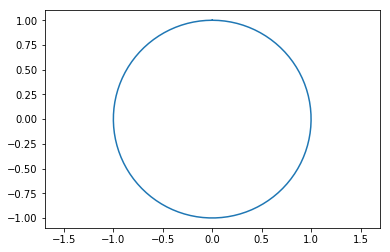

In [11]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

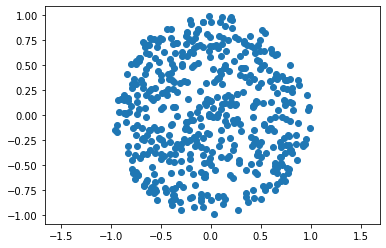

In [46]:
d=np.random.rand(500,2)
d[:,0]=d[:,0]*np.pi*2
d[:,1]=np.sqrt(d[:,1])
x=d[:,1]*np.cos(d[:,0])
y=d[:,1]*np.sin(d[:,0])
plt.scatter(x,y)
plt.axis('equal')
plt.show()

Задача 6

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [56]:
n=100
def walk(n):
    d=np.ones(2*n)
    i1=np.random.choice(np.arange(n),int(n/2),replace=False)
    i2=np.random.choice(np.arange(n,2*n),int(n/2),replace=False)
    d[i1]=-1
    d[i2]=-1
    d=d.reshape(2,n)
    C=np.array([1/np.sqrt(2),1/np.sqrt(2),-1/np.sqrt(2),1/np.sqrt(2)]).reshape(2,2)
    d=np.matmul(C,d).T/np.sqrt(2)
    d=d.cumsum(axis=0)
    d= np.vstack(([0,0], d))
    return d
d=walk(n)

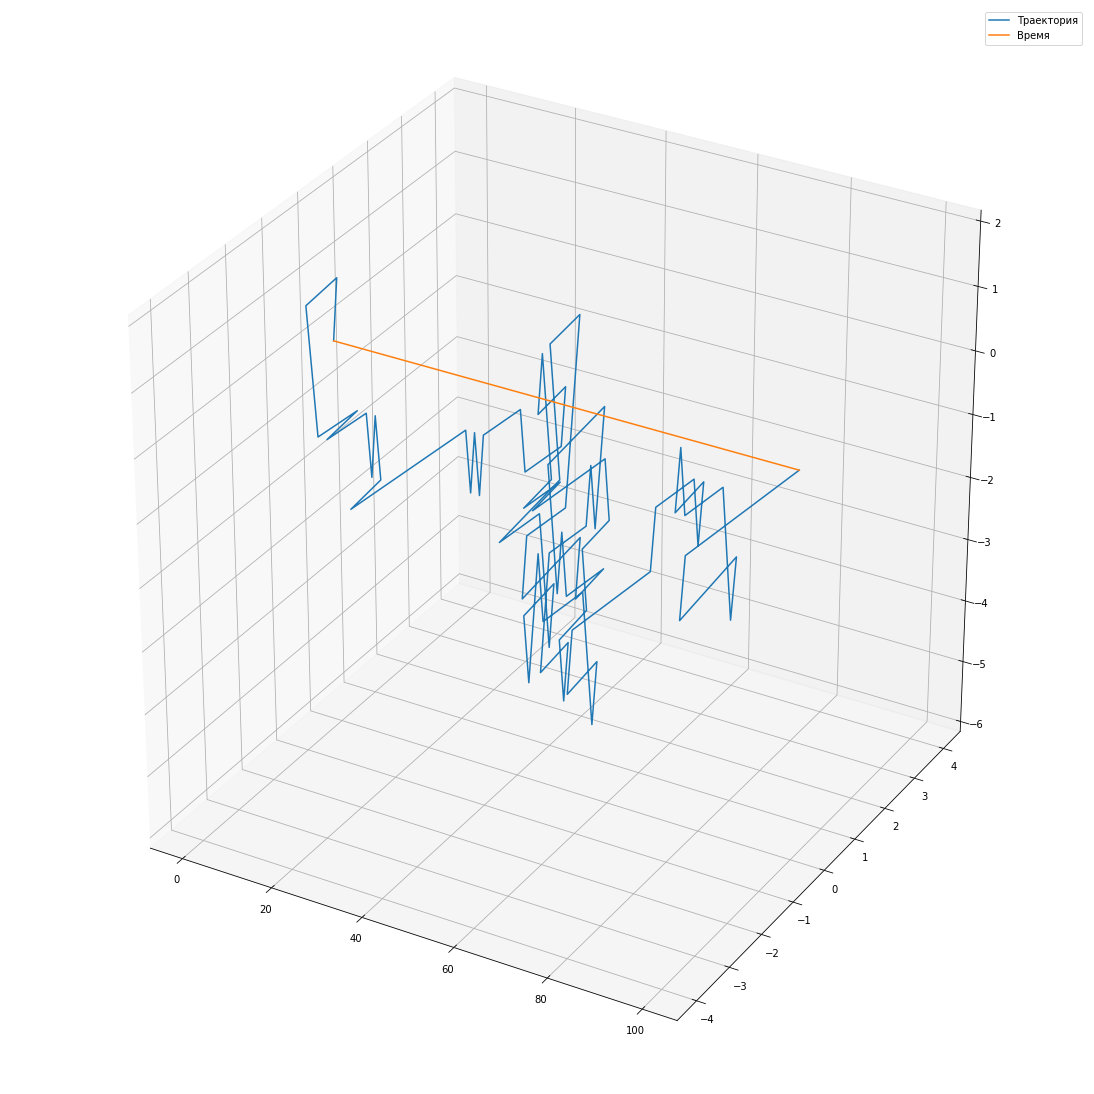

In [57]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15, 15))
ax=Axes3D(fig)
plt.grid()
ax.plot(np.arange(n+1),d[:,0],d[:,1],label='Траектория')
ax.plot(np.arange(n+1),np.zeros(n+1),np.zeros(n+1),label='Время')
plt.legend()
plt.show()

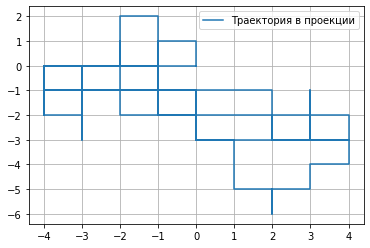

In [58]:
plt.grid()
plt.plot(d[:,0],d[:,1],label='Траектория в проекции')
plt.legend()
plt.show()

Задача 7

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

Обоснование: если рассмотреть двумерное стандартное нормальное распределение (X,Y) и перейти к полярным координатам (fi,r), то очевидно, что fi распределён равномерно, а r=X^2+Y^2 - это распределение хи-квадрат, которое при двух слогаемых будет экспоненциальным с параметром = 0,5 , то есть чтобы смоделировать вектор из независимых стандартных нормальных, нам нужно смоделировать одно равномерное на (0,2П) и экспоненциальное распределение, затем переходим к обычным координатам и получаем две независимые стандартные нормальные с.в.

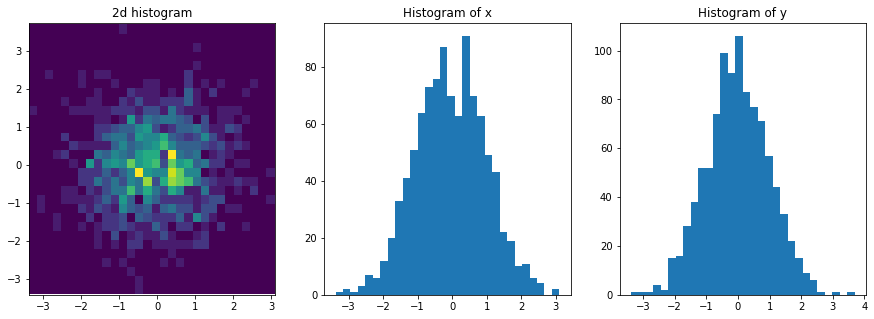

In [59]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Модификация: избавиться от тригонометрических функций можно, задав угол не прямо, а косвенно через прямоугольные координаты случайной точки в круге (метод отбора). А потом перейти к полярным координатам.

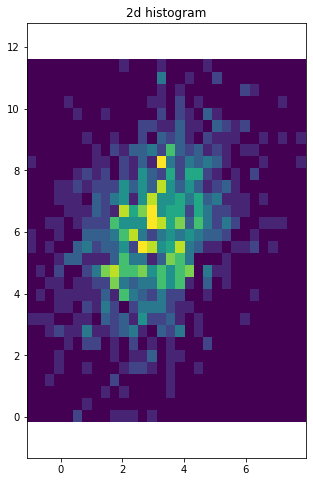

In [79]:
import math
n = 1000
def Norm(n):
    d=np.empty(0, dtype=float)
    d1=np.empty(0, dtype=float)
    с=0
    while с<n:
        x=np.random.rand()*2-1
        y=np.random.rand()*2-1
        if(abs(y)<math.sqrt(1-x*x)):
            d = np.append(d, x) 
            d1 = np.append(d1, y) 
            с+=1
    s=np.square(d)+np.square(d1)
    cos=d/np.sqrt(s)
    sin=d1/np.sqrt(s)
    N1=cos*np.sqrt(-2*np.log(s))
    N2=sin*np.sqrt(-2*np.log(s))
    return N1,N2
N1,N2=Norm(n)
A=np.array([1/2,np.sqrt(7)/2,2,0]).reshape(2,2)
v=np.vstack((N1, N2))
v=np.matmul(A,v).T
v[:,0]=v[:,0]+3
v[:,1]=v[:,1]+6
fig, ax = plt.subplots(1,1,figsize=(5, 8))
ax.hist2d(v[:,0], v[:,1], bins=30)
ax.set_title("2d histogram")
ax.axis('equal')
plt.show()

Задача 8

Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [93]:
n=10000
N1,N2=Norm(n)
N=N1
for i in range(4):
    N1,N2=Norm(n)
    N=np.vstack((N,N1, N2))
A=np.array([np.sqrt(2),0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,-0.5,0,np.sqrt(15)/2,0,0,0,0,0,-1/np.sqrt(2),0,0,0,np.sqrt(3/2),0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,-0.5,0,0,0,np.sqrt(15)/2,0,0,0,0,0,0,0,-0.5,0,np.sqrt(15)/2,0,-1/np.sqrt(2),0,0,0,-np.sqrt(3/2),0,0,0,0]).reshape(9,9)
print(N.shape)

(9, 10000)


In [86]:
for i in range(9):
    print(np.matmul(A, A.T)[i,:])

[ 2.  0.  0.  0. -1.  0.  0.  0. -1.]
[ 0.  4.  0. -1.  0.  0.  0.  0.  0.]
[ 0.  0.  4.  0.  0.  0. -1.  0.  0.]
[ 0. -1.  0.  4.  0.  0.  0.  0.  0.]
[-1.  0.  0.  0.  2.  0.  0.  0. -1.]
[ 0.  0.  0.  0.  0.  4.  0. -1.  0.]
[ 0.  0. -1.  0.  0.  0.  4.  0.  0.]
[ 0.  0.  0.  0.  0. -1.  0.  4.  0.]
[-1.  0.  0.  0. -1.  0.  0.  0.  2.]


Значит матрица А правильная

Посчитаем выборочные ковариации

In [92]:
d=np.matmul(A,N).T
Ans=np.empty(0, dtype=float)
for i in range(9):
    for k in range(9):
        Ans = np.append(Ans, ((d[:,i]-(d[:,i].mean()))*(d[:,k]-(d[:,k].mean()))).mean())
Ans=Ans.reshape(9,9)        
for i in range(9):
    print(Ans[i,:])
(np.matmul(A, A.T)-Ans).max()

[ 1.97697972 -0.06991119  0.00374081  0.00805263 -0.99568502  0.03751427
 -0.01569345  0.00546661 -0.9812947 ]
[-6.99111944e-02  3.98993581e+00  1.43106054e-03 -9.95316224e-01
  2.08300670e-02 -1.10612388e-02 -4.13084184e-02  2.11679758e-02
  4.90811274e-02]
[ 3.74081431e-03  1.43106054e-03  4.00514329e+00  5.58568062e-02
  3.57092493e-02 -2.49006040e-02 -9.96118077e-01 -5.18582823e-02
 -3.94500636e-02]
[ 8.05262561e-03 -9.95316224e-01  5.58568062e-02  3.91033248e+00
 -6.08126583e-02  6.12731709e-02  2.67691507e-03 -1.20585376e-03
  5.27600327e-02]
[-0.99568502  0.02083007  0.03570925 -0.06081266  1.98852782 -0.0312952
 -0.04162844 -0.0105578  -0.9928428 ]
[ 3.75142713e-02 -1.10612388e-02 -2.49006040e-02  6.12731709e-02
 -3.12951952e-02  4.04365035e+00  2.14712557e-03 -1.03518442e+00
 -6.21907614e-03]
[-1.56934456e-02 -4.13084184e-02 -9.96118077e-01  2.67691507e-03
 -4.16284421e-02  2.14712557e-03  3.94695018e+00  2.62510038e-02
  5.73218877e-02]
[ 5.46661307e-03  2.11679758e-02 -5.185

0.08966752364189023

Задача 9

С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

Воспользуемся неравенством Чебышёва: P(|(Сумма Xi от 0 до n)*4/n - Пи| >= 0,0004)<=D((Сумма Xi от 0 до n)*4/n)/(0,0004)^2 из этого неравенства оценим n, то есть D((Сумма Xi от 0 до n)*4/n)/(0,0004)^2<=0,01 после преобразований получаем: 

In [18]:
n=int((np.pi/4-np.square(np.pi/4))*np.power(10,9)*10)+1
n

1685478884

In [30]:
n=1000000
for i in range(1,20):
    x, y = np.random.rand(2, n)
    m=np.square(x)+np.square(y)<1
    pi=m.sum()*4/n
    print(n,' : ',pi)
    n+=1000000


1000000  :  3.13818
2000000  :  3.138408
3000000  :  3.1416173333333335
4000000  :  3.141508
5000000  :  3.1417632
6000000  :  3.141728666666667
7000000  :  3.1419731428571427
8000000  :  3.140648
9000000  :  3.1414346666666666
10000000  :  3.1416164
11000000  :  3.140527272727273
12000000  :  3.1418296666666667
13000000  :  3.142217846153846
14000000  :  3.1417125714285716
15000000  :  3.1416568
16000000  :  3.1413645
17000000  :  3.141473411764706
18000000  :  3.141850888888889
19000000  :  3.141741684210526


То есть на практике, где-то при выборке более 15000000 наблюдается точность в 3 знака после запятой.